# Project3 - Ensembling Technique

# Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

import pydotplus
import graphviz

from statistics import mean,median

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score

C:\Users\Saravan\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Basic EDA

In [3]:
data.shape

(45211, 17)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [6]:
data.isnull().sum().to_frame('Presence of missing values').T #for checking presence of missing values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Presence of missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data['poutcome'].value_counts() #For count of unique values in poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [8]:
data['contact'].value_counts() #For count of unique values in contact

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [9]:
data['education'].value_counts() #For count of unique values in education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [10]:
data['job'].value_counts() #For count of unique values in job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [12]:
#The dataset has unknown values in 'job','education','contact' and 'poutcome' columns

In [13]:
data.describe().T #5point summary or statistical summary

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# 5 point summary understanding:
###### Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
###### 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
###### More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile
###### Minimum balance is -8019 and maximum balance is 102127
###### Minimum age is 18 years and maximum is 95 years

In [14]:
#data.loc[data['pdays'] == 999]

In [15]:
#All customers have been contacted previously

C:\Users\Saravan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


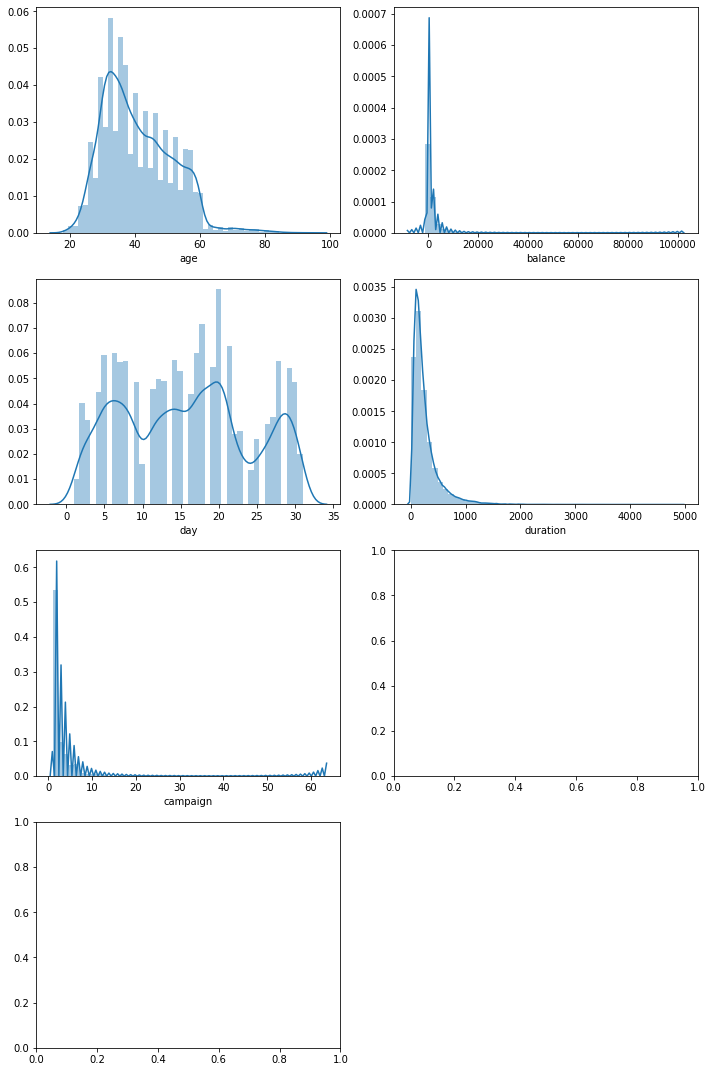

In [16]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.distplot(data['age'],ax=axe[0]) #Distance plot of 'age'
sns.distplot(data['balance'],ax=axe[1]) #Distance plot of 'balance'
sns.distplot(data['day'],ax=axe[2]) #Distance plot of 'day'
sns.distplot(data['duration'],ax=axe[3]) #Distance plot of 'duration'
sns.distplot(data['campaign'],ax=axe[4]) #Distance plot of 'campaign'
#sns.distplot(data['pdays'],ax=axe[5]) #Distance plot of 'pdays'
#sns.distplot(data['previous'],ax=axe[6]) #Distance plot of 'previous'
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

C:\Users\Saravan\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


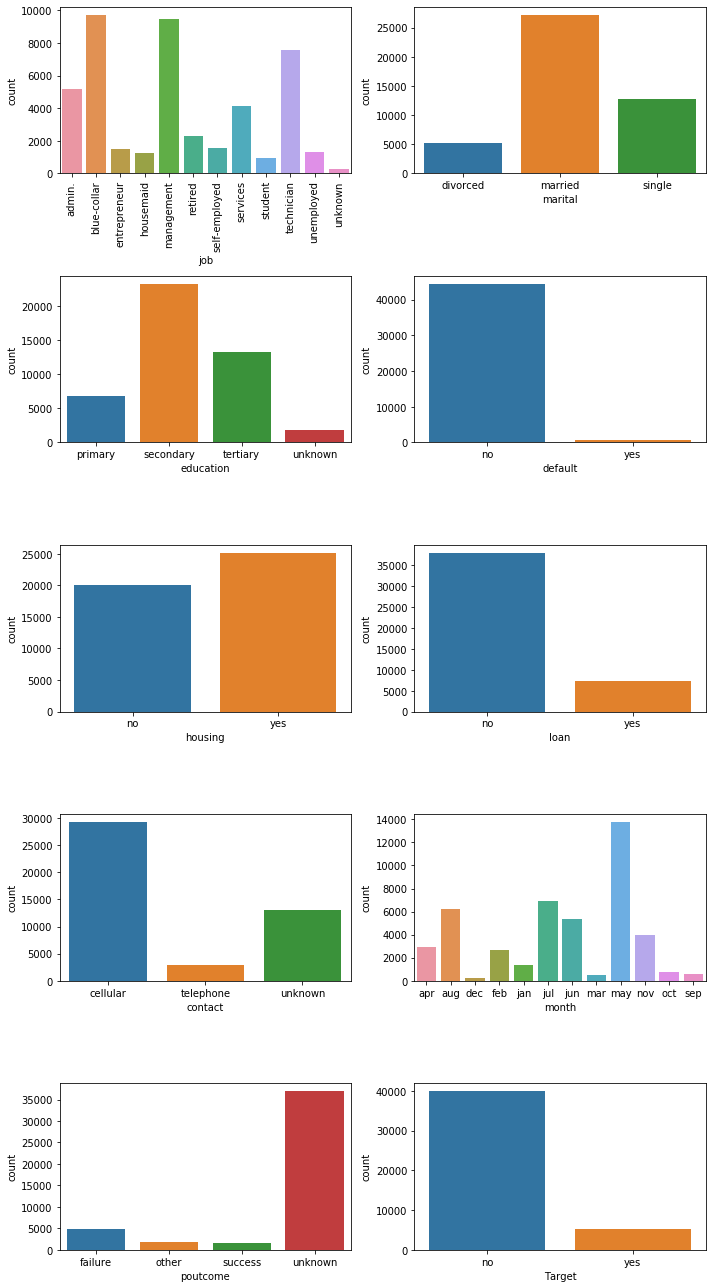

In [17]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
plot=sns.countplot(x=data['job'],data=data,ax=axe[0]) #Countplot of 'job' 
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1]) #Countplot of 'marital' 
sns.countplot(x=data['education'],data=data,ax=axe[2]) #Countplot of 'education' 
sns.countplot(x=data['default'],data=data,ax=axe[3]) #Countplot of 'default' 
sns.countplot(x=data['housing'],data=data,ax=axe[4]) #Countplot of 'housing' 
sns.countplot(x=data['loan'],data=data,ax=axe[5]) #Countplot of 'loan' 
sns.countplot(x=data['contact'],data=data,ax=axe[6]) #Countplot of 'contact' 
sns.countplot(x=data['month'],data=data,ax=axe[7]) #Countplot of 'month' 
sns.countplot(x=data['poutcome'],data=data,ax=axe[8]) #Countplot of 'poutcome' 
sns.countplot(x=data['Target'],data=data,ax=axe[9]) #Countplot of 'target' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots


# Understanding from distributions

##### More than 90% customers have no default credit
##### Around 88% customers have not subscribed for term deposit
##### Most customers have been contacted in may
##### Most customers have been contacted by cellular network(mobile phone)
##### Number of customers who have housing loan is more than the number of customers who don't have housing loan
##### Around 6% customers have credit in default

In [18]:
data.skew().to_frame('Skewness measure').T #for measure of skewness

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


C:\Users\Saravan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


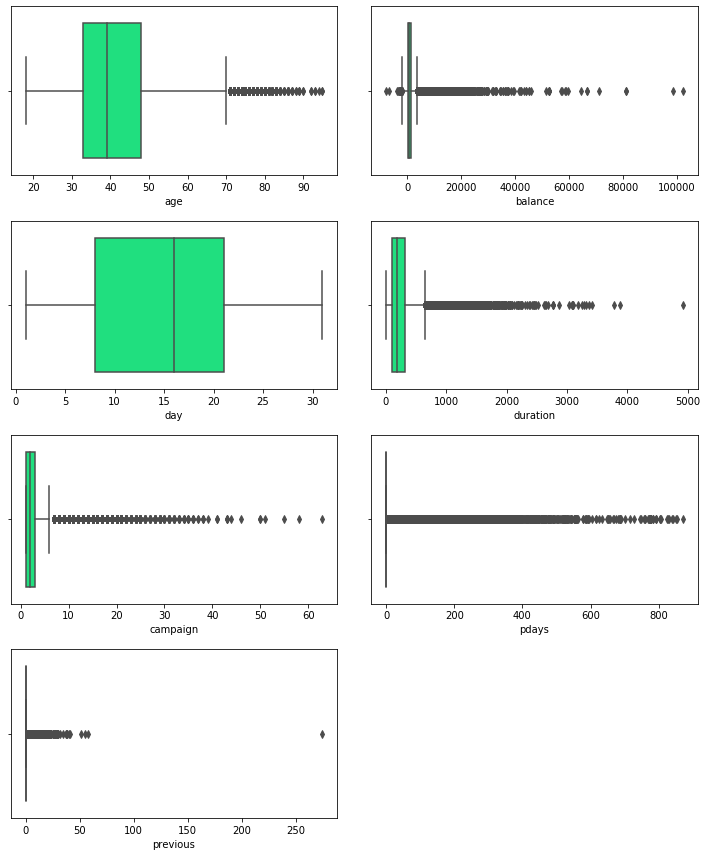

In [19]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=data,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=data,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=data,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=data,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=data,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=data,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=data,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

# Understanding from boxplots
###### Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
###### Values less than 0 are present in 'Balance' column

In [21]:
data['Target'].value_counts().to_frame('Target column distriution') # Value counts of Target column

,Target column distriution
no,39922
yes,5289


In [23]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
df = data.copy()
encoder = LabelEncoder()
df['default']=encoder.fit_transform(df['default']).astype(int) 
df['marital']=encoder.fit_transform(df['marital']).astype(int) 
df['loan']=encoder.fit_transform(df['loan']).astype(int) 
df['housing']=encoder.fit_transform(df['housing']).astype(int) 
df['Target']=encoder.fit_transform(df['Target']).astype(int) 
df['month']=encoder.fit_transform(df['month']).astype(int) 
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int) 
df['education']=encoder.fit_transform(df['education']).astype(int) 
df.head(5).T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [30]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
#changing datatypes of attributes

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handling Outliers with mean replacement

In [37]:
meanbal = float(df['balance'].mean()) #mean balance
df['balance'] = np.where(df['balance'] >np.percentile(df['balance'], 75), meanbal,df['balance']) #replacing with mean
meanbal

578.7802335809035

In [38]:
meanduration = float(df['duration'].mean()) 
df['duration'] = np.where(df['duration'] >np.percentile(df['duration'], 75), meanduration,df['duration']) #replacing with mean
meanduration

256.94496680031597

In [41]:
meancompaign = float(df['campaign'].mean())
df['campaign'] = np.where(df['campaign'] >np.percentile(df['campaign'], 75), meancompaign,df['campaign']) #replacing with mean
meancompaign

28.271818527059818

In [42]:
meanpdays = float(df['pdays'].mean())
df['pdays'] = np.where(df['pdays'] >np.percentile(df['pdays'], 75), meanpdays,df['pdays']) #replacing with mean
meanpdays

6.524064176507795

# #Box plot for finding outliers 

C:\Users\Saravan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


Boxplots after handeling outliers


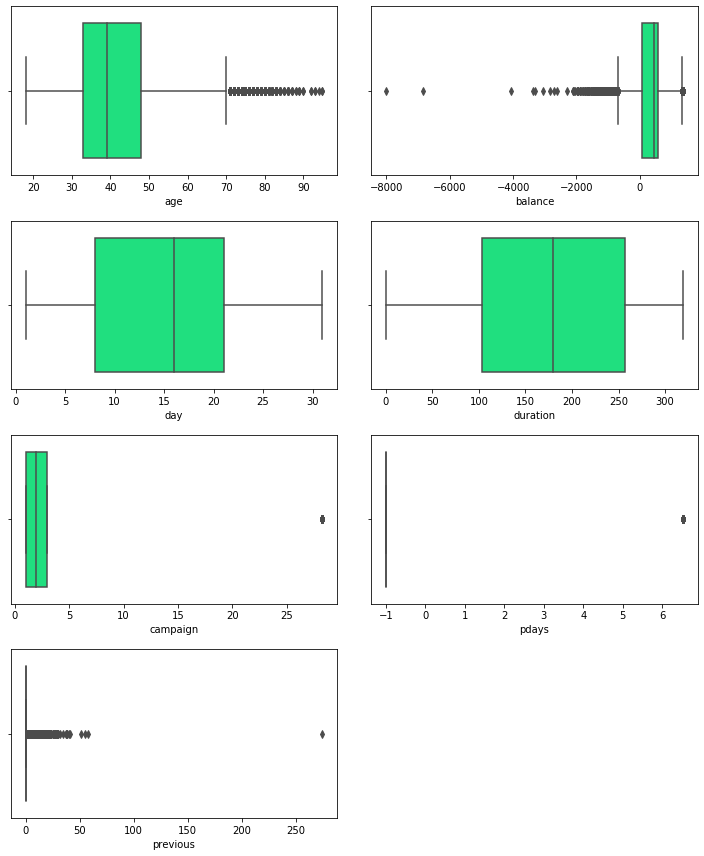

In [45]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df,color='springgreen',ax=axe[0])  
sns.boxplot(x='balance',data=df,color='springgreen',ax=axe[1]) 
sns.boxplot(x='day',data=df,color='springgreen',ax=axe[2]) 
sns.boxplot(x='duration',data=df,color='springgreen',ax=axe[3])
sns.boxplot(x='campaign',data=df,color='springgreen',ax=axe[4])
sns.boxplot(x='pdays',data=df,color='springgreen',ax=axe[5]) 
sns.boxplot(x='previous',data=df,color='springgreen',ax=axe[6])
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')

# Corr plot of all features


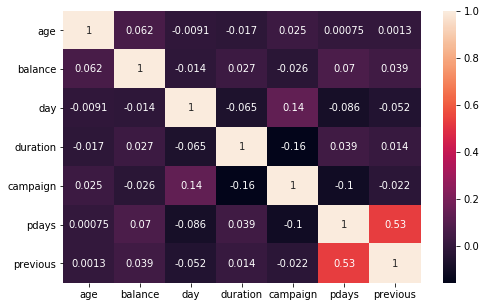

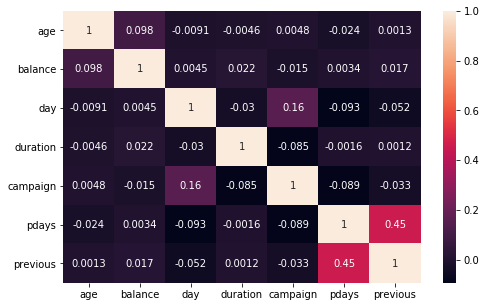

In [55]:
plt.figure(figsize=(8,5)) #for adjusting figuresize
sns.heatmap(df.corr(),annot=True) #for correlation plot

#before removing outliers
plt.figure(figsize=(8,5)) #for adjusting figuresize
sns.heatmap(data.corr(),annot=True) #for correlation plot

In [57]:
df2 = df.drop(['job','education','contact','duration','pdays','day','month'],axis=1) 
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,578.780234,1,0,1.0,0,3,0
1,44,2,0,29.000000,1,0,1.0,0,3,0
2,33,1,0,2.000000,1,1,1.0,0,3,0
3,47,1,0,578.780234,1,0,1.0,0,3,0
4,33,2,0,1.000000,0,0,1.0,0,3,0


# Pairplot of the features

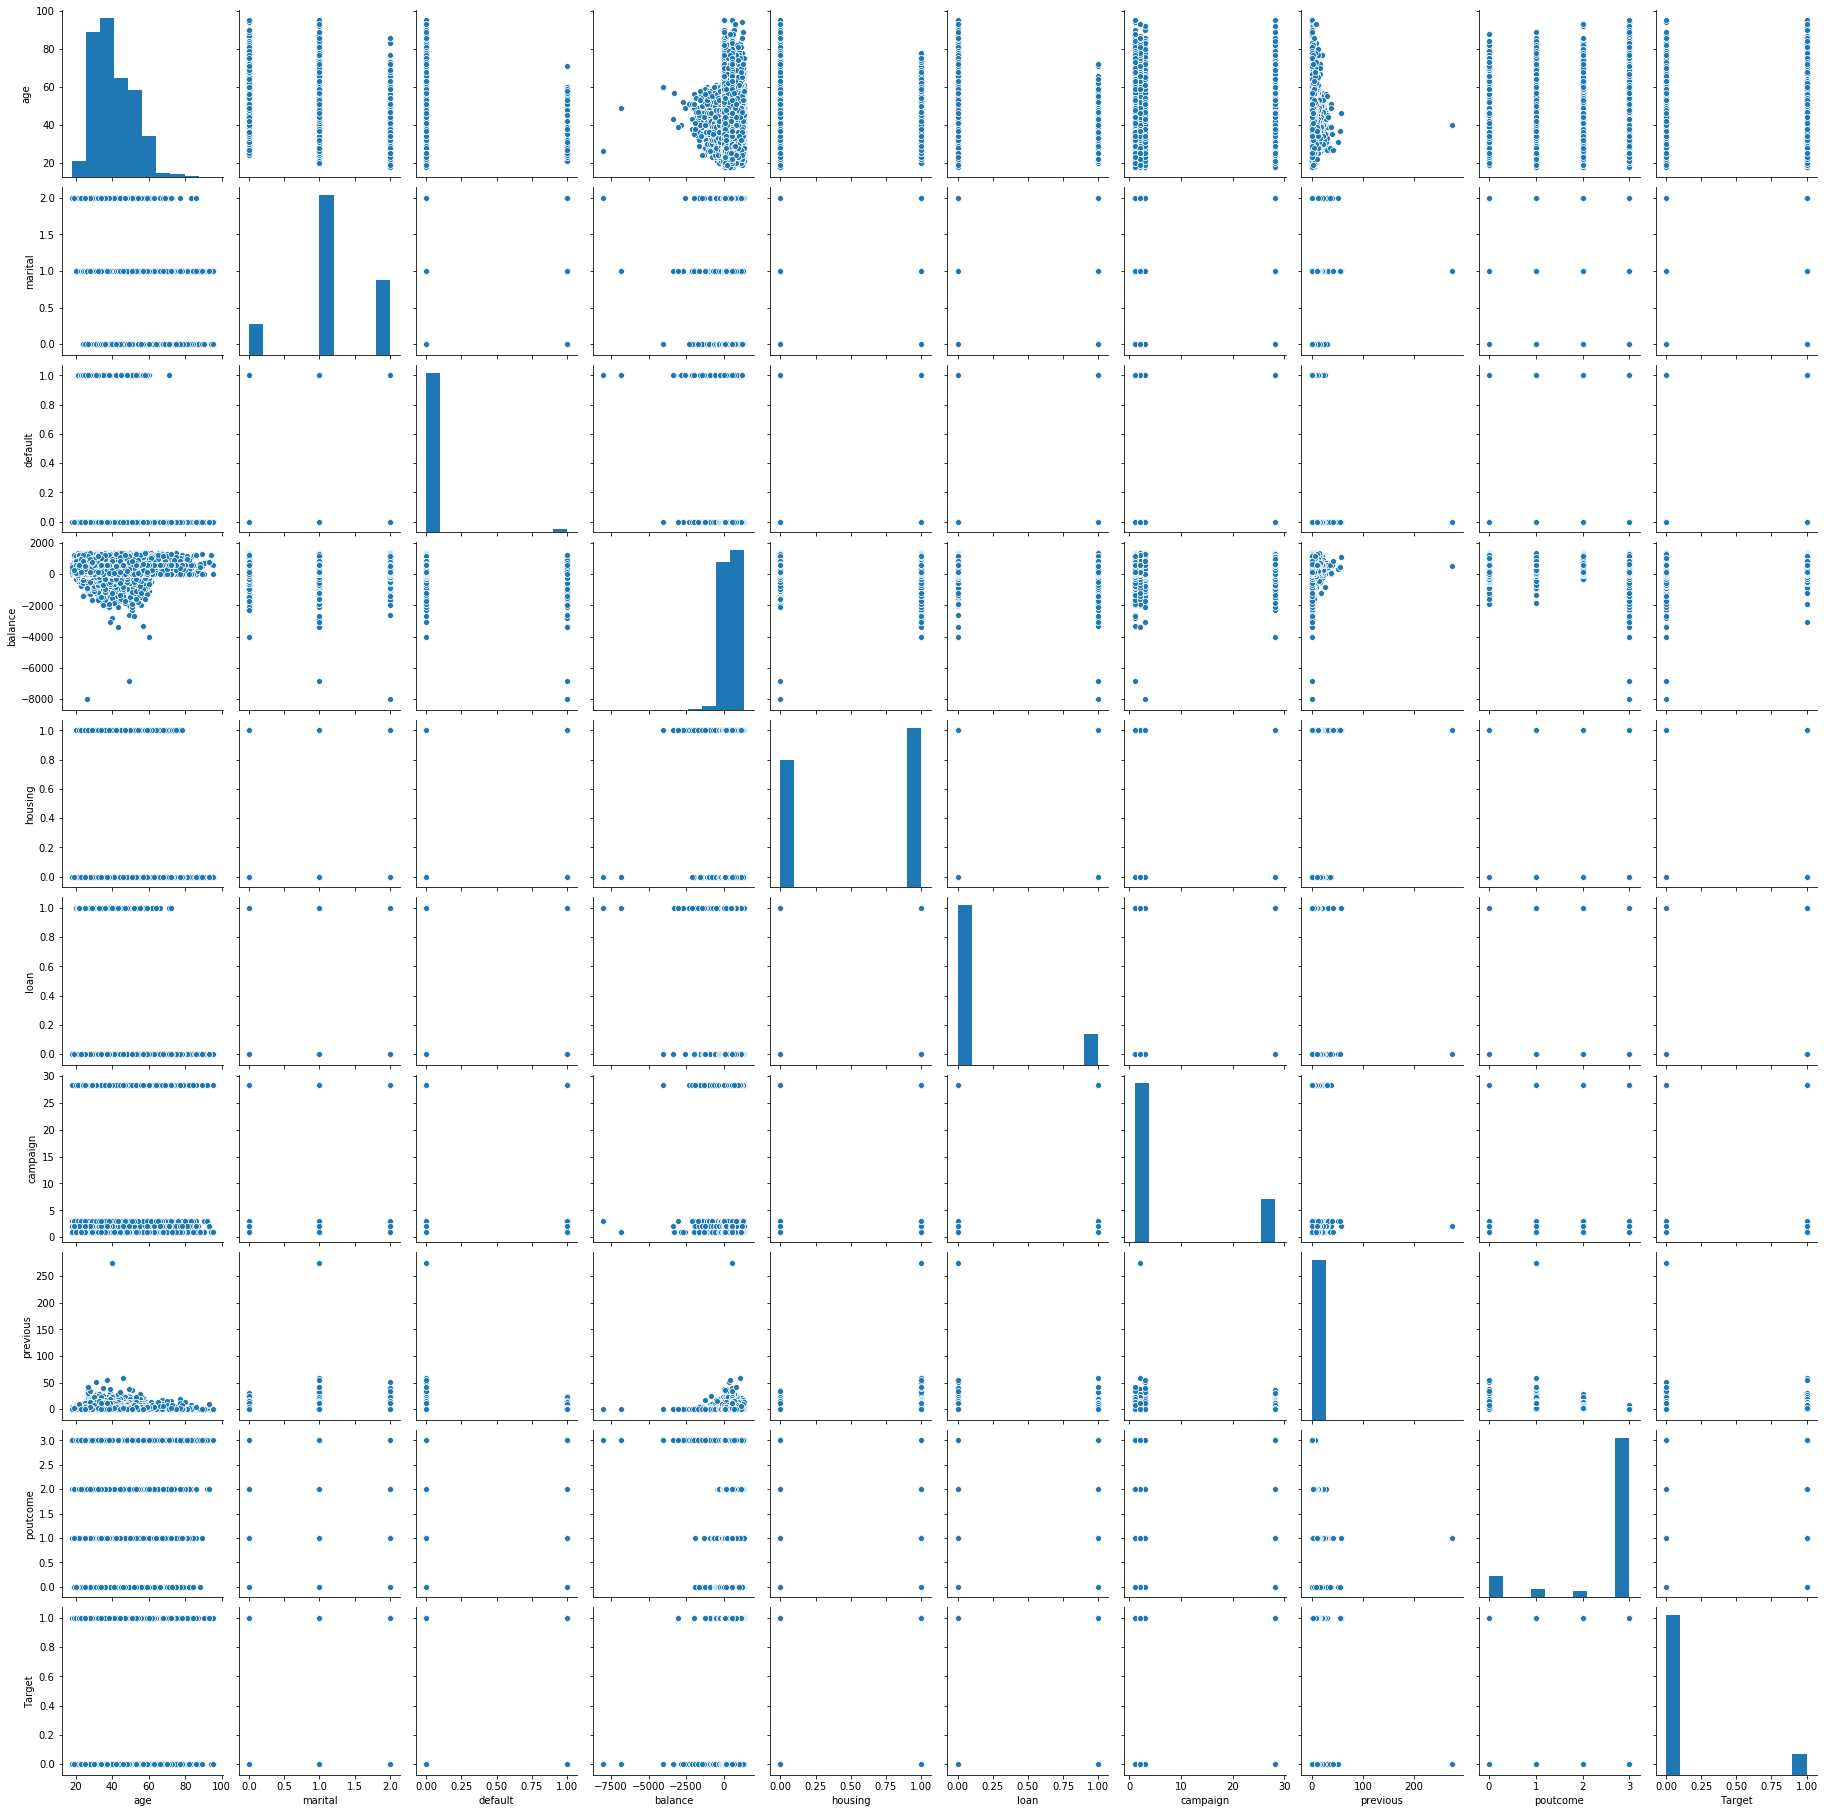

In [59]:
sns.pairplot(df2)

# Splitting data for training and testing

In [60]:
x = df2.drop('Target', axis=1)
y = df2['Target']

In [61]:
x.head(5)

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,578.780234,1,0,1.0,0,3
1,44,2,0,29.000000,1,0,1.0,0,3
2,33,1,0,2.000000,1,1,1.0,0,3
3,47,1,0,578.780234,1,0,1.0,0,3
4,33,2,0,1.000000,0,0,1.0,0,3


In [64]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [68]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Creating Models

# 1. Logistic Regression Model

In [71]:
logistic_reg = LogisticRegression(solver='liblinear')
logistic_reg.fit(x_train_scaled,y_train)
y_pred = logistic_reg.predict(x_test_scaled)
LR_acc = accuracy_score(y_test,y_pred)
print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score: \n',LR_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,y_pred))


 Confusion Matrics: 

 [[11981    18]
 [ 1556     9]]

 Accuracy Score: 
 88.39575346505455

 Classification Report: 

               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11999
           1       0.33      0.01      0.01      1565

    accuracy                           0.88     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.88      0.83     13564



# 2. Naive Bayes

In [72]:
NB = GaussianNB()
NB.fit(x_train_scaled,y_train)
y_pred_NB = NB.predict(x_test_scaled)

NB_acc = accuracy_score(y_test,y_pred_NB)
print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,y_pred_NB))
print('\n Accuracy Score: \n',NB_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,y_pred_NB))



 Confusion Matrics: 

 [[11434   565]
 [ 1270   295]]

 Accuracy Score: 
 86.47154231790033

 Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.95      0.93     11999
           1       0.34      0.19      0.24      1565

    accuracy                           0.86     13564
   macro avg       0.62      0.57      0.58     13564
weighted avg       0.84      0.86      0.85     13564



# 3. KNN Model

In [74]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)

knn_acc = accuracy_score(y_test,y_pred_knn)
print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,y_pred_knn))
print('\n Accuracy Score: \n',knn_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,y_pred_knn))


 Confusion Matrics: 

 [[11510   489]
 [ 1250   315]]

 Accuracy Score: 
 87.17929814214096

 Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.39      0.20      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



# 4. SVC Model

In [75]:
svc = SVC()
svc.fit(x_train_scaled,y_train)
y_pred_svc = svc.predict(x_test_scaled)
svc_acc = accuracy_score(y_test,y_pred_svc)

print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,y_pred_svc))
print('\n Accuracy Score: \n',svc_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,y_pred_svc))


 Confusion Matrics: 

 [[11887   112]
 [ 1324   241]]

 Accuracy Score: 
 89.41315246240048

 Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# 5. Decision Tree Model

In [77]:
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt.fit(x_train_scaled,y_train)
y_pred_dt = dt.predict(x_test_scaled)

dt_acc = accuracy_score(y_test,y_pred)
print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,y_pred_dt))
print('\n Accuracy Score: \n',dt_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,y_pred_dt))


 Confusion Matrics: 

 [[10463  1536]
 [ 1115   450]]

 Accuracy Score: 
 88.39575346505455

 Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.87      0.89     11999
           1       0.23      0.29      0.25      1565

    accuracy                           0.80     13564
   macro avg       0.57      0.58      0.57     13564
weighted avg       0.83      0.80      0.81     13564



# Feature importance test for decision tree

In [78]:
xvar = df.drop('Target', axis=1) #variables in x
feature_cols = xvar.columns # columns in x
feat_importance = dt.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dt.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
education,0.415937
age,0.260815
contact,0.088119
loan,0.082819
housing,0.065723
job,0.038751
balance,0.024474
default,0.019665
marital,0.003698


# 6. Bagging Ensemble Model

In [85]:
bagc = BaggingClassifier(base_estimator=dt, n_estimators=500,random_state=1) #Instantiate Bagging Classifier
bagc = bagc.fit(x_train_scaled, y_train) 
#Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(x_test_scaled) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) #for confusion matrix
print('-'*30)
BAG_acc = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_acc)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_BAG)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11570   429]
 [ 1225   340]]
------------------------------
Accuracy of Decision Tree :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.44      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# 7. Adaptive Boosting

In [83]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(x_train_scaled, y_train) #Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(x_test_scaled) #Predict

ada_acc = accuracy_score(y_test,predicted_ADA)
print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,predicted_ADA))
print('\n Accuracy Score: \n',ada_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,predicted_ADA))


 Confusion Matrics: 

 [[11887   112]
 [ 1342   223]]

 Accuracy Score: 
 89.28044824535534

 Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.67      0.14      0.23      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



# Randomforest Ensemble Model

In [84]:
rf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3) #Instantiate Random Forest Classifier
rf.fit(x_train_scaled, y_train)
#Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RF = rf.predict(x_test_scaled)

rf_acc = accuracy_score(y_test,predicted_RF)
print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,predicted_RF))
print('\n Accuracy Score: \n',rf_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,predicted_RF))


 Confusion Matrics: 

 [[11526   473]
 [ 1219   346]]

 Accuracy Score: 
 87.52580359775878

 Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Gradient boosting

In [86]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(x_train_scaled, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(x_test_scaled) #Predict

gradient_acc = accuracy_score(y_test,predicted_GRAD)
print('\n Confusion Matrics: \n\n', confusion_matrix(y_test,predicted_GRAD))
print('\n Accuracy Score: \n',gradient_acc*100)
print('\n Classification Report: \n\n',classification_report(y_test,predicted_GRAD))


 Confusion Matrics: 

 [[11882   117]
 [ 1317   248]]

 Accuracy Score: 
 89.42789737540548

 Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# Model with Accuracy score

In [90]:
Scores = [('Naive bayes', NB_acc*100),
      ('KNN', knn_acc*100),
      ('Logistic Regression', LR_acc*100),
      ('SVC', svc_acc*100),
      ('Decision Tree',dt_acc*100),
      ('Bagging',BAG_acc*100),
      ('Adaptive Boosting',ada_acc*100),
      ('Gradient Boosting',gradient_acc*100),
      ('Random Forest',rf_acc*100)] #List of accuracy scores of all models

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) #Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) #Sort values in descending manner

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
7,Gradient Boosting,89.427897
3,SVC,89.413152
6,Adaptive Boosting,89.280448
2,Logistic Regression,88.395753
4,Decision Tree,88.395753
5,Bagging,87.805957
8,Random Forest,87.525804
1,KNN,87.179298
0,Naive bayes,86.471542


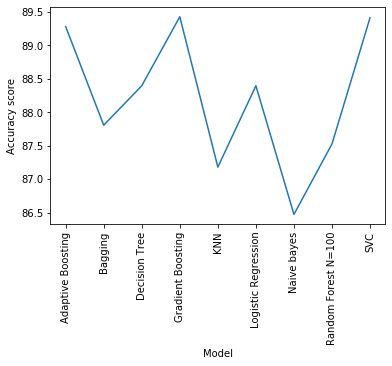

In [89]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()

# Conclusion

 Gradient Boosting achived 89.4% highest value of model accuracy.